# Task 4.10

### Import Libraries

In [1]:
#import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import Data of orders, products and cusomers merged data

In [2]:
#### importing instamart modified data

path = r'E:\Aarthi Sarath\Career Foundry\Exercise 4\Instacart Basket Analsis'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_prods_cust_4.9_1.csv') , nrows = 1000000 , index_col = False)

In [3]:
##df = df.drop(['Unnamed: 0'] , axis=1)

In [4]:
df.shape

(1000000, 35)

### Check for the PII in the data

In [5]:
#shows columns
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'add_to_cart_order', 'reordered',
       'user_id', 'order_number', 'order_day_of_the_week', 'order_hour_of_day',
       'days_since_prior_order', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spending_flag', 'customer_frequency',
       'frequency_flag', 'First Name', 'Surnam', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

PII columns are - First Name , Surname
It is crucial to ensure the security and privacy of the individuals whose data is being handled.If this data is presenting then need to be mask or Anonymize.

In [6]:
###  Create a regional segmentation of the data  

In [7]:
#### importing instamart modified data with ['user_id', 'product_name','prices', 'price_range_loc','loyalty_flag', 'average_spending','spending_flag', 'STATE' columns

col_list =  ['user_id', 'product_name','prices', 'price_range_loc','loyalty_flag', 'average_spending','spending_flag', 'STATE'] 
path = r'E:\Aarthi Sarath\Career Foundry\Exercise 4\Instacart Basket Analsis'
df_spend = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_prods_cust_4.9_1.csv') , usecols=col_list , index_col = False)

In [8]:
df_spend

,product_name,prices,user_id,price_range_loc,loyalty_flag,average_spending,spending_flag,STATE
0,Chocolate Sandwich Cookies,5.8,38259,Mid-range product,New customer,7.163333,Low spender,District of Columbia
1,Sliced American Cheese,7.8,38259,Mid-range product,New customer,7.163333,Low spender,District of Columbia
2,Sparkling Water,1.1,38259,Low-range product,New customer,7.163333,Low spender,District of Columbia
3,Clementines,4.3,38259,Low-range product,New customer,7.163333,Low spender,District of Columbia
4,Clementines,4.3,38259,Low-range product,New customer,7.163333,Low spender,District of Columbia
...,...,...,...,...,...,...,...,...
32404854,Organic Half & Half,1.8,56454,Low-range product,New customer,1.800000,Low spender,Washington
32404855,Orange Sparkling Water,7.5,74506,Mid-range product,New customer,7.500000,Low spender,Vermont
32404856,Orange Sparkling Water,7.5,74506,Mid-range product,New customer,7.500000,Low spender,Vermont
32404857,Orange Sparkling Water,7.5,74506,Mid-range product,New customer,7.500000,Low spender,Vermont


# Create a dataframe subset to analyze spending habits in different US regions
col_list =  ['user_id', 'product_name','prices', 'price_range_loc','loyalty_flag', 'average_spending','spending_flag', 'STATE'] 
# Since we are dealing with a huge table, let's keep only the columns we are going to work with
spendings = df[col_list]
spendings

In [9]:
result = []
for value in df_spend['STATE']:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    result.append('Northeast')
  elif value in ['Wisconsin','Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    result.append('Midwest')
  elif value in ['Delaware', ' Maryland', ' District of Columbia', ' Virginia', ' West Virginia', ' North Carolina', ' South Carolina', ' Georgia', ' Florida',
                'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    result.append('South')  
  else:
    result.append('West')
      

In [10]:
# Create a column with geographical regions
df_spend['region'] = result
print(df_spend['region'].value_counts(dropna=False))
df_spend.head()

region
West         13360974
Midwest       7597325
South         5723824
Northeast     5722736
Name: count, dtype: int64


,product_name,prices,user_id,price_range_loc,loyalty_flag,average_spending,spending_flag,STATE,region
0,Chocolate Sandwich Cookies,5.8,38259,Mid-range product,New customer,7.163333,Low spender,District of Columbia,West
1,Sliced American Cheese,7.8,38259,Mid-range product,New customer,7.163333,Low spender,District of Columbia,West
2,Sparkling Water,1.1,38259,Low-range product,New customer,7.163333,Low spender,District of Columbia,West
3,Clementines,4.3,38259,Low-range product,New customer,7.163333,Low spender,District of Columbia,West
4,Clementines,4.3,38259,Low-range product,New customer,7.163333,Low spender,District of Columbia,West


In [11]:
# Check the spender type against the geographical region
cross_tab = pd.crosstab(df_spend['spending_flag'], df_spend['region'])
print(cross_tab)

region         Midwest  Northeast    South      West
spending_flag                                       
High spender     29265      18642    22605     49216
Low spender    7568060    5704094  5701219  13311758


In [12]:
#Normalisnig Results of spending against regions
# Check the spender type against the geographical region
cross_tab_normalize = pd.crosstab(df_spend['spending_flag'], df_spend['region'] , normalize = 'columns') * 100
print(cross_tab_normalize)

region           Midwest  Northeast      South       West
spending_flag                                            
High spender    0.385201   0.325753   0.394928   0.368356
Low spender    99.614799  99.674247  99.605072  99.631644


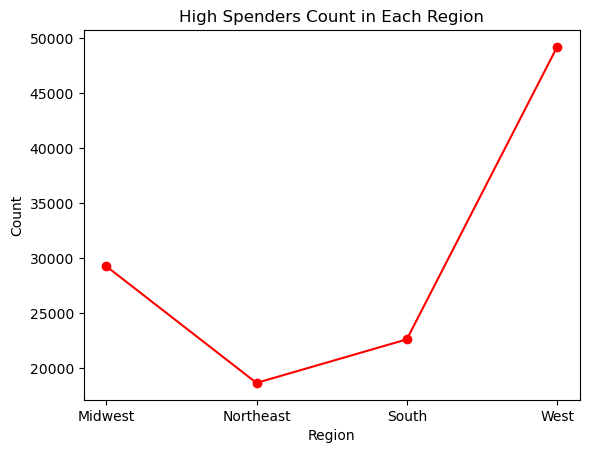

In [13]:
# Plotting high spenders against the regions
high_spenders = cross_tab.loc['High spender'] # Extract the row corresponding to 'High spender'
regions = high_spenders.index.tolist() # Extracting region names from the columns
spender_counts = high_spenders.values.tolist() # Extracting spender counts from the values
plt.plot(regions, spender_counts, marker='o', linestyle='solid', color='red', label='High Spenders') # Make line plot of high spenders
# Add title and labels
plt.title('High Spenders Count in Each Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'line_high-spenders_regions.png')) # Save the plot

This distributions shows west has more high spender and northeast region has low high spender

### Exclude low-activity customers

df = df.drop(['Unnamed: 0'] , axis=1)

In [99]:
# Create exlucions criteria for customers with less than 5 orders
df.loc[df['max_order'] < 5, 'low_activity'] = 'Yes' # Mark the low activity customers
df_filtered = df[df['low_activity'] != 'Yes'] # Exclude low activity customers
print(df_filtered.head())

    product_id                product_name  aisle_id  department_id  prices  \
60           1  Chocolate Sandwich Cookies        61             19     5.8   
61           1  Chocolate Sandwich Cookies        61             19     5.8   
62           1  Chocolate Sandwich Cookies        61             19     5.8   
63           1  Chocolate Sandwich Cookies        61             19     5.8   
64           1  Chocolate Sandwich Cookies        61             19     5.8   

    order_id  add_to_cart_order  reordered  user_id  order_number  ...  \
60      5319                  3          1   196224            65  ...   
61     54412                  5          1   196224            23  ...   
62    238541                  1          1   196224            73  ...   
63    238782                  1          1   196224             6  ...   
64    268206                  6          1   196224            48  ...   

    Surnam  Gender     STATE Age date_joined n_dependants fam_status  income  \


In [100]:
# Drop the low activity column 
df_filtered2 = df_filtered.drop(columns=['low_activity'])
df_filtered2

,product_id,product_name,aisle_id,department_id,prices,order_id,add_to_cart_order,reordered,user_id,order_number,...,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge
60,1,Chocolate Sandwich Cookies,61,19,5.8,5319,3,1,196224,65,...,Roger,Casey,Male,New York,48,4/29/2018,2,married,43906,both
61,1,Chocolate Sandwich Cookies,61,19,5.8,54412,5,1,196224,23,...,Roger,Casey,Male,New York,48,4/29/2018,2,married,43906,both
62,1,Chocolate Sandwich Cookies,61,19,5.8,238541,1,1,196224,73,...,Roger,Casey,Male,New York,48,4/29/2018,2,married,43906,both
63,1,Chocolate Sandwich Cookies,61,19,5.8,238782,1,1,196224,6,...,Roger,Casey,Male,New York,48,4/29/2018,2,married,43906,both
64,1,Chocolate Sandwich Cookies,61,19,5.8,268206,6,1,196224,48,...,Roger,Casey,Male,New York,48,4/29/2018,2,married,43906,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,48595,Organic Wheat Square Crackers,78,19,1.8,250168,19,0,28263,2,...,Wanda,Manning,Female,District of Columbia,48,9/12/2018,1,married,98894,both
999996,48775,Organic Red Cabbage,83,4,7.4,254530,14,1,28263,7,...,Wanda,Manning,Female,District of Columbia,48,9/12/2018,1,married,98894,both
999997,48775,Organic Red Cabbage,83,4,7.4,1120745,5,0,28263,3,...,Wanda,Manning,Female,District of Columbia,48,9/12/2018,1,married,98894,both
999998,49075,Organic Brown Rice,38,1,11.5,1786035,9,0,28263,9,...,Wanda,Manning,Female,District of Columbia,48,9/12/2018,1,married,98894,both


In [101]:
# Save the output
df_filtered2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ord_prod_cust_high-activity.pkl'))

### Customer Profiling

In [102]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'add_to_cart_order', 'reordered', 'user_id', 'order_number',
       'order_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spending_flag', 'customer_frequency',
       'frequency_flag', 'First Name', 'Surnam', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', '_merge',
       'low_activity'],
      dtype='object')

In [103]:
# Choose relevant columns for customer profiling
profiles = df.drop(columns=['days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'aisle_id', 'busiest_days',
       'busiest_period_of_day', 'frequency_flag', '_merge', 'low_activity'])

In [104]:
profiles['region'] = df_spend['region']
profiles.head()

,product_name,department_id,prices,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,price_range_loc,busiest_day,...,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region
0,Chocolate Sandwich Cookies,19,5.8,1107,38259,2,1,11,Mid-range product,Regularly busy,...,NaN,Bean,Female,District of Columbia,68,6/30/2019,2,married,142744,West
1,Sliced American Cheese,16,7.8,1107,38259,2,1,11,Mid-range product,Regularly busy,...,NaN,Bean,Female,District of Columbia,68,6/30/2019,2,married,142744,West
2,Sparkling Water,7,1.1,3369664,38259,3,2,8,Low-range product,Regularly busy,...,NaN,Bean,Female,District of Columbia,68,6/30/2019,2,married,142744,West
3,Clementines,4,4.3,1107,38259,2,1,11,Low-range product,Regularly busy,...,NaN,Bean,Female,District of Columbia,68,6/30/2019,2,married,142744,West
4,Clementines,4,4.3,2899757,38259,1,1,15,Low-range product,Regularly busy,...,NaN,Bean,Female,District of Columbia,68,6/30/2019,2,married,142744,West


In [24]:
#Checking Age for customers

print('The minimun customer age is: ', profiles['Age'].min()) # We are checking for min age of customers
print('The maximum customer age is: ', profiles['Age'].max()) # ...and for the max age of customers

The minimun customer age is:  18
The maximum customer age is:  81


In [26]:
##profiles = profiles.drop(['Unnamed: 0.1'] , axis=1)

In [28]:
# Bin the ages of customer into 10 year categories
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-90']
profiles['age_category'] = pd.cut(profiles['Age'], bins=bins, labels=labels, right=False)

In [29]:
# Check how many customers are present in each age category
profiles['age_category'].value_counts(dropna=False)

age_category
20-29    167089
60-69    166085
50-59    157703
70-79    150430
40-49    147321
30-39    141572
0-19      36782
80-90     33018
Name: count, dtype: int64

In [30]:
# Check the prices of the products ordered within each age category
profiles.groupby('age_category').agg({'prices': ['mean','min','max']})

C:\Users\admin\AppData\Local\Temp\ipykernel_1204\3100710533.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('age_category').agg({'prices': ['mean','min','max']})


prices           
                  mean  min   max
age_category                     
0-19          7.757135  1.0  25.0
20-29         7.581726  1.0  25.0
30-39         7.650352  1.0  25.0
40-49         7.665956  1.0  25.0
50-59         7.636112  1.0  25.0
60-69         7.682726  1.0  25.0
70-79         7.667424  1.0  25.0
80-90         7.712184  1.0  25.0

C:\Users\admin\AppData\Local\Temp\ipykernel_1204\3493727185.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('age_category').agg({'prices': ['mean']}).plot(kind='bar', color='red', edgecolor='black')


<Figure size 1000x600 with 0 Axes>

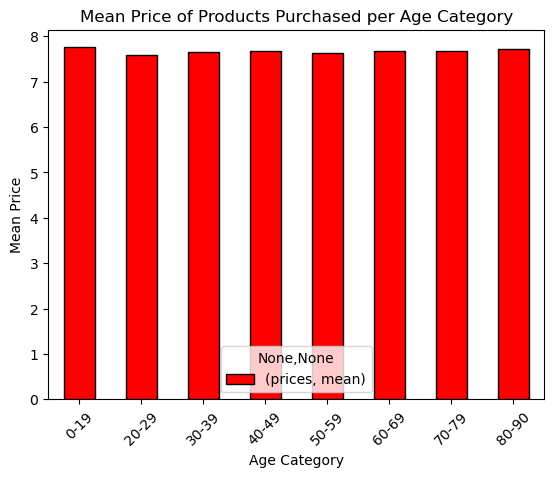

In [32]:
# Plot distribution of prices within age categories as a bar chart
plt.figure(figsize=(10, 6))
profiles.groupby('age_category').agg({'prices': ['mean']}).plot(kind='bar', color='red', edgecolor='black')

# Add labels and title
plt.xlabel('Age Category')
plt.ylabel('Mean Price')
plt.title('Mean Price of Products Purchased per Age Category')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_price_age-group.png')) # Save the plot

In [33]:
# Check the orders within each age category
profiles.groupby('age_category').agg({'max_order': ['mean','min','max']})

C:\Users\admin\AppData\Local\Temp\ipykernel_1204\3003582466.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('age_category').agg({'max_order': ['mean','min','max']})


max_order        
                   mean min max
age_category                   
0-19          42.883149   3  99
20-29         43.540185   3  99
30-39         41.636263   3  99
40-49         44.754136   3  99
50-59         41.025225   3  99
60-69         41.940892   3  99
70-79         42.272426   3  99
80-90         42.095100   3  99

C:\Users\admin\AppData\Local\Temp\ipykernel_1204\549196405.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('age_category').agg({'max_order': ['mean']}).plot(kind='bar', color='red', edgecolor='black')


<Figure size 1000x600 with 0 Axes>

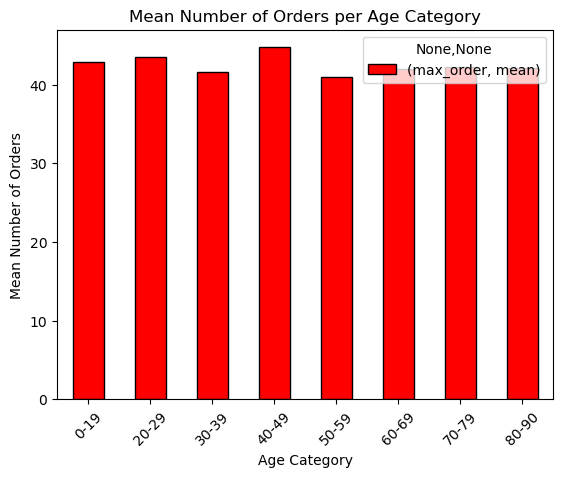

In [34]:
# Plot distribution of orders within age categories as a bar chart
plt.figure(figsize=(10, 6))
profiles.groupby('age_category').agg({'max_order': ['mean']}).plot(kind='bar', color='red', edgecolor='black')

# Add labels and title
plt.xlabel('Age Category')
plt.ylabel('Mean Number of Orders')
plt.title('Mean Number of Orders per Age Category')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_orders_age-group.png')) # Save the plot

# We can clearly see that the number of orders as well as the amount of money spent does not depend on age of the customers. We move on to analyze customer profiles by income.

In [35]:
print('The minimun customer income is: ', profiles['income'].min()) # We are checking for min income of customers
print('The maximum customer income is: ', profiles['income'].max()) # ...and for the max income of customers

The minimun customer income is:  25972
The maximum customer income is:  544248


In [36]:
# Bin the income of customer into 50k categories
bins = [25000, 75000, 125000, 175000, 225000, 275000, 325000, 375000, 425000, 475000, 525000, 575000, 625000]
labels = ['25000-75000', '75001-125000', '125001-175000', '175001-225000', '225001-27500', '275001-325000', '325001-375000', '375001-425000', '425001-475000', '475001-525000', '525001-575000', '575001-625000']
profiles['income_category'] = pd.cut(profiles['income'], bins=bins, labels=labels, right=False)

In [37]:
# Check how many customers are present in each income category
profiles['income_category'].value_counts(dropna=False)

income_category
75001-125000     408917
25000-75000      347135
125001-175000    237225
175001-225000      2256
225001-27500       1256
525001-575000       981
275001-325000       877
375001-425000       614
325001-375000       603
425001-475000       136
475001-525000         0
575001-625000         0
Name: count, dtype: int64

In [38]:
# Check the prices of the products ordered within each income category
profiles.groupby('income_category').agg({'prices': ['mean','min','max']})

C:\Users\admin\AppData\Local\Temp\ipykernel_1204\767505731.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('income_category').agg({'prices': ['mean','min','max']})


prices           
                     mean  min   max
income_category                     
25000-75000      7.241977  1.0  25.0
75001-125000     7.881897  1.0  25.0
125001-175000    7.857698  1.0  25.0
175001-225000    7.196927  1.0  17.3
225001-27500     8.362540  1.0  24.3
275001-325000    7.903661  1.0  15.0
325001-375000    8.420300  1.1  15.7
375001-425000    7.193475  1.1  14.9
425001-475000    7.260976  1.3  14.7
475001-525000         NaN  NaN   NaN
525001-575000    7.840923  1.0  23.0
575001-625000         NaN  NaN   NaN

C:\Users\admin\AppData\Local\Temp\ipykernel_1204\3185422016.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('income_category').agg({'prices': ['mean']}).plot(kind='bar', color='red', edgecolor='black')


<Figure size 1000x600 with 0 Axes>

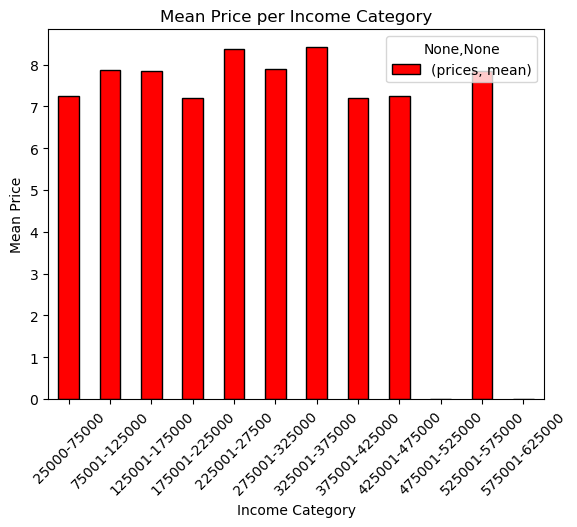

In [41]:
# Plot distribution of prices within income categories as a bar chart
plt.figure(figsize=(10, 6))
profiles.groupby('income_category').agg({'prices': ['mean']}).plot(kind='bar', color='red', edgecolor='black')

# Add labels and title
plt.xlabel('Income Category')
plt.ylabel('Mean Price')
plt.title('Mean Price per Income Category')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_prices_income-group.png')) # Save the plot

In [42]:
# Check the orders within each income category
profiles.groupby('income_category').agg({'max_order': ['mean','min','max']})

C:\Users\admin\AppData\Local\Temp\ipykernel_1204\3687362349.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('income_category').agg({'max_order': ['mean','min','max']})


max_order            
                      mean   min   max
income_category                       
25000-75000      42.489035   3.0  99.0
75001-125000     42.787673   3.0  99.0
125001-175000    41.977056   3.0  99.0
175001-225000    60.848404  12.0  91.0
225001-27500     23.681529   8.0  42.0
275001-325000    41.584949  20.0  50.0
325001-375000    71.000000  71.0  71.0
375001-425000    49.000000  49.0  49.0
425001-475000    15.000000  15.0  15.0
475001-525000          NaN   NaN   NaN
525001-575000    43.003058  17.0  50.0
575001-625000          NaN   NaN   NaN

C:\Users\admin\AppData\Local\Temp\ipykernel_1204\850472204.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('income_category').agg({'max_order': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')


<Figure size 1000x600 with 0 Axes>

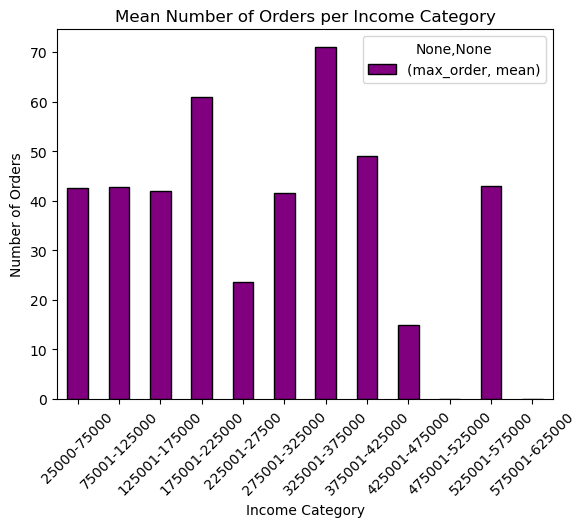

In [44]:
# Plot distribution of orders within income categories as a bar chart
plt.figure(figsize=(10, 6))
profiles.groupby('income_category').agg({'max_order': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')

# Add labels and title
plt.xlabel('Income Category')
plt.ylabel('Number of Orders')
plt.title('Mean Number of Orders per Income Category')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_orders_income-group.png')) # Save the plot

#Even though we don't see differences in average prices paid according to income categories, we do see differences in number of orders made in each of income categories. Definitely, the customers at the high-end of incomes order the most, and it's about twice as much as other categories, even though the lowest income customers are the most numerous.

In [45]:
#checking shopping per department

profiles.groupby('department_id').agg({'prices': ['mean','min','max']}) # Prices by department

prices           
                    mean  min   max
department_id                      
1               7.786657  1.0  15.0
2               6.862739  1.1  14.8
3               7.904531  1.0  15.0
4               7.902651  1.0  15.0
5               8.621754  1.0  15.0
6               7.722321  1.0  15.0
7               7.564180  1.0  15.0
8               7.960056  1.1  15.0
9               7.413569  1.0  15.0
10              7.440304  4.5  14.1
11              8.149224  1.0  15.0
12             15.995352  8.0  25.0
13              8.004320  1.0  20.0
14              7.872876  1.0  14.9
15              7.629239  1.0  15.0
16              8.325140  1.0  15.0
17              7.359971  1.0  15.0
18              7.553278  1.1  15.0
19              4.277176  1.6   7.0
20              7.740682  1.0  15.0
21              8.205344  1.1  15.0

In [46]:
profiles.groupby('department_id').agg({'max_order': ['mean','min','max']}) # Order numbers by department

max_order        
                    mean min max
department_id                   
1              37.156432   3  99
2              38.871550   3  99
3              42.677995   3  99
4              43.445923   3  99
5              42.724380   3  99
6              40.102683   3  99
7              44.269581   3  99
8              39.493836   3  99
9              38.018177   3  99
10             47.794071   3  99
11             40.262193   3  99
12             39.284999   3  99
13             40.618406   3  99
14             43.722848   3  99
15             37.607650   3  99
16             44.528583   3  99
17             38.127671   3  99
18             46.658575   3  99
19             43.726533   3  99
20             41.475993   3  99
21             40.587490   3  99

In [47]:
aggregated = profiles.groupby('department_id').agg({'max_order': ['mean', 'min', 'max']}) # Define the max orders again as a variable

aggregated.columns = ['mean_order', 'min_order', 'max_order'] # Flatten the column names
mean_of_means = aggregated['mean_order'].mean() # Calculate the mean of the means
std_of_means = aggregated['mean_order'].std() # Calculate the standard deviation of the means

print('Average number of orders in all departments is ', mean_of_means, '+/-', std_of_means )


Average number of orders in all departments is  41.483598521691306 +/- 2.9839807715034707


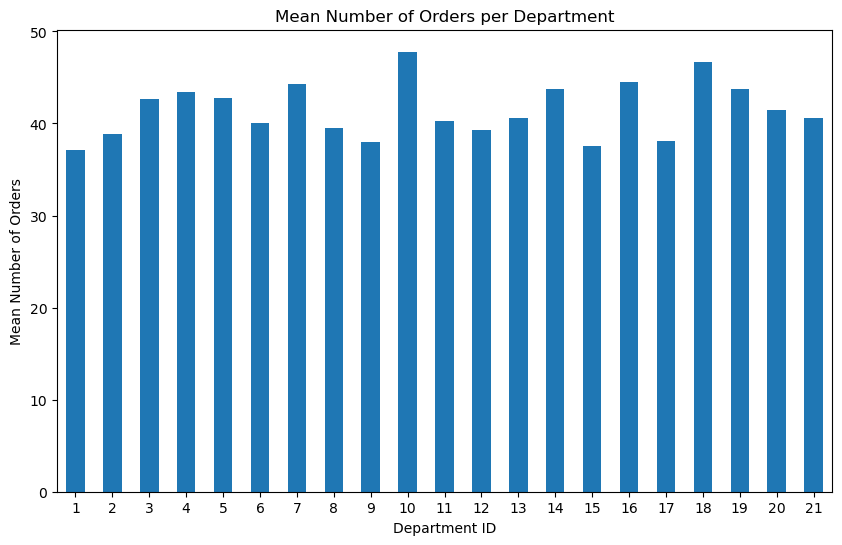

In [48]:
# Plot the mean number of orders per department
ord_dep = profiles.groupby('department_id')['max_order'].mean()
ord_dep.plot(kind='bar', figsize=(10, 6))
# Labels
plt.xlabel('Department ID')
plt.ylabel('Mean Number of Orders')
plt.title('Mean Number of Orders per Department')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_orders_departments.png')) # Save the plot

# Based on the data above, we can see that the highest prices and highest average prices are achieved by department 12 and the lowest by department 19. The average number of orders vary between the departments but overall it differs only slightly. the highest number of orders was observed in departments 10 and 18, the lowest in 5, 8, 17 & 21.


In [50]:
#organize the customers based on their gender, family status, number of family members

# Let's start with genders
# Check how many customers are present in each age category
profiles['Gender'].value_counts(dropna=False)

Gender
Male      504391
Female    495609
Name: count, dtype: int64

In [ ]:
# Prices by gender
profiles.groupby('Gender').agg({'prices': ['mean','min','max']})

In [53]:
# Orders by gender
profiles.groupby('Gender').agg({'max_order': ['mean','min','max']})

max_order        
             mean min max
Gender                   
Female  43.308009   3  99
Male    41.754946   3  99

# The number of male and female customers is similar, as well as the spendings and number of orders made by each gender.

In [54]:
# Checking family status
profiles['fam_status'].value_counts(dropna=False)

fam_status
married                             694007
single                              161024
divorced/widowed                     88997
living with parents and siblings     55972
Name: count, dtype: int64

In [55]:
# Checking number of family members
profiles['n_dependants'].value_counts(dropna=False)

n_dependants
2    258290
3    250836
0    250021
1    240853
Name: count, dtype: int64

In [56]:
# Check the family status against family members
cross_fam = pd.crosstab(profiles['fam_status'], profiles['n_dependants'])
print(cross_fam)

n_dependants                           0       1       2       3
fam_status                                                      
divorced/widowed                   88997       0       0       0
living with parents and siblings       0   23850   16802   15320
married                                0  217003  241488  235516
single                            161024       0       0       0


In [57]:
# Flag different family situations based on the table above to check potential differences in ordering
profiles.loc[(profiles['fam_status'] == 'divorced/widowed') | (profiles['fam_status'] == 'single'), 'family_flag'] = 'alone adult'
profiles.loc[(profiles['fam_status'] == 'married') & (profiles['n_dependants'] == 1), 'family_flag'] = 'two adults'
profiles.loc[(profiles['fam_status'] == 'married') & (profiles['n_dependants'] > 1), 'family_flag'] = 'two adults with kids'
profiles.loc[profiles['fam_status'] == 'living with parents and siblings', 'family_flag'] = 'dependent adult'

# Checking the family_flag values
print(profiles['family_flag'].value_counts(dropna=False))

family_flag
two adults with kids    477004
alone adult             250021
two adults              217003
dependent adult          55972
Name: count, dtype: int64


In [58]:
# Check the prices of the products ordered within each family flag
profiles.groupby('family_flag').agg({'prices': ['mean','min','max']})

prices           
                          mean  min   max
family_flag                              
alone adult           7.602330  1.0  25.0
dependent adult       7.689653  1.0  25.0
two adults            7.686614  1.0  25.0
two adults with kids  7.659657  1.0  25.0

In [59]:
# Check the prices of the products ordered within each family flag by regions
profiles.groupby(['family_flag', 'region']).agg({'prices': ['mean','min','max']})

prices           
                                    mean  min   max
family_flag          region                        
alone adult          Midwest    7.625773  1.0  25.0
                     Northeast  7.598600  1.0  25.0
                     South      7.604984  1.0  25.0
                     West       7.591384  1.0  25.0
dependent adult      Midwest    7.678073  1.0  25.0
                     Northeast  7.799160  1.0  25.0
                     South      7.788112  1.0  25.0
                     West       7.618300  1.0  25.0
two adults           Midwest    7.740313  1.0  25.0
                     Northeast  7.800145  1.0  25.0
                     South      7.637771  1.0  25.0
                     West       7.630787  1.0  25.0
two adults with kids Midwest    7.604987  1.0  25.0
                     Northeast  7.644464  1.0  25.0
                     South      7.707623  1.0  25.0
                     West       7.672087  1.0  25.0

In [60]:
# Check the orders within each family flag by regions
profiles.groupby(['family_flag', 'region']).agg({'max_order': ['mean','min','max']})

max_order        
                                     mean min max
family_flag          region                      
alone adult          Midwest    44.812781   3  99
                     Northeast  39.430685   3  99
                     South      45.170961   3  99
                     West       42.966913   3  99
dependent adult      Midwest    42.420172   3  93
                     Northeast  47.953381   5  99
                     South      45.870297   4  89
                     West       49.327595   4  99
two adults           Midwest    42.229611   3  99
                     Northeast  39.275134   3  82
                     South      40.830978   3  99
                     West       42.051724   3  99
two adults with kids Midwest    39.618271   3  99
                     Northeast  47.363424   3  99
                     South      39.625558   3  99
                     West       41.914401   3  99

#output: We can see form above results that the family flag didn't show any differences in ordering and pricing.

In [61]:
# Check the prices within each family flag by departments
profiles.groupby(['family_flag', 'department_id']).agg({'prices': ['mean','min','max']})

prices           
                                        mean  min   max
family_flag          department_id                     
alone adult          1              7.795986  1.0  15.0
                     2              7.270213  1.2  14.8
                     3              7.873608  1.0  15.0
                     4              7.931323  1.0  15.0
                     5              8.420278  1.2  15.0
...                                      ...  ...   ...
two adults with kids 17             7.334649  1.0  15.0
                     18             7.711958  1.2  15.0
                     19             4.290711  1.6   7.0
                     20             7.778575  1.1  15.0
                     21             8.145042  1.1  15.0

[84 rows x 3 columns]

In [62]:
# Check the orders within each family flag by departments
profiles.groupby(['family_flag', 'department_id']).agg({'max_order': ['mean','min','max']})

max_order        
                                         mean min max
family_flag          department_id                   
alone adult          1              36.739588   3  99
                     2              34.914894   3  99
                     3              43.558427   3  99
                     4              44.133416   3  99
                     5              33.294235   3  67
...                                       ...  ..  ..
two adults with kids 17             39.643988   3  99
                     18             44.723704   3  99
                     19             43.350058   3  99
                     20             39.114797   3  99
                     21             41.200000   3  99

[84 rows x 3 columns]

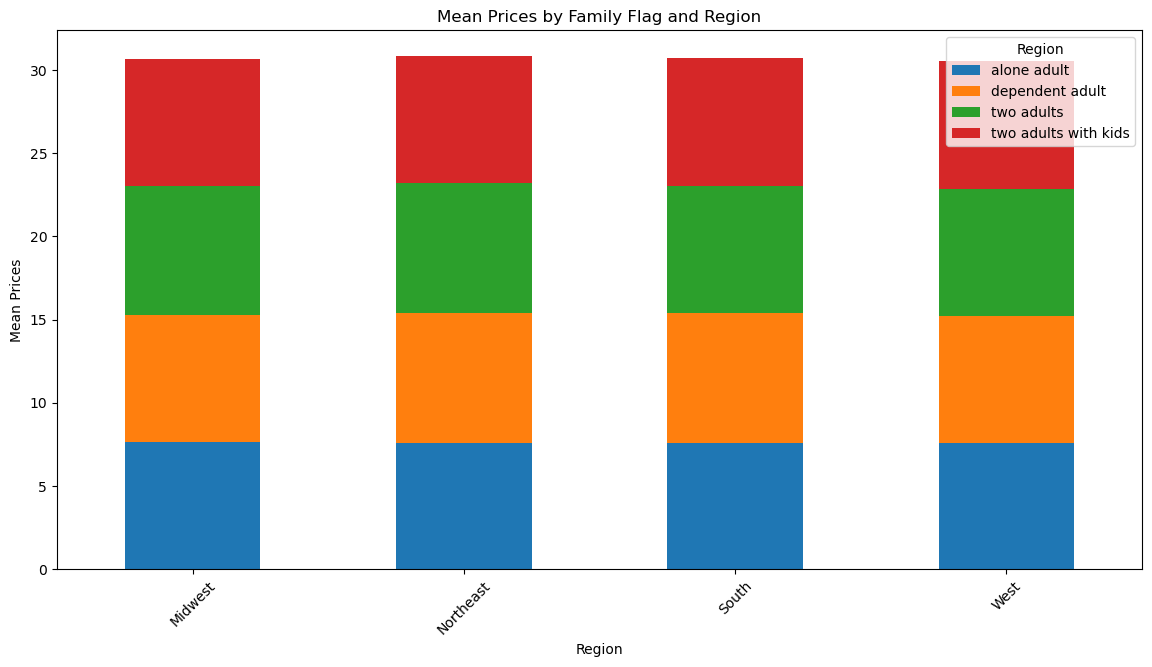

In [63]:
# Group by 'family_flag' and 'region', then calculate mean of 'prices'
grouped = profiles.groupby(['region', 'family_flag'])['prices'].mean().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.xlabel('Region')
plt.ylabel('Mean Prices')
plt.title('Mean Prices by Family Flag and Region')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_prices_fam-flag_region.png')) # Save the plot

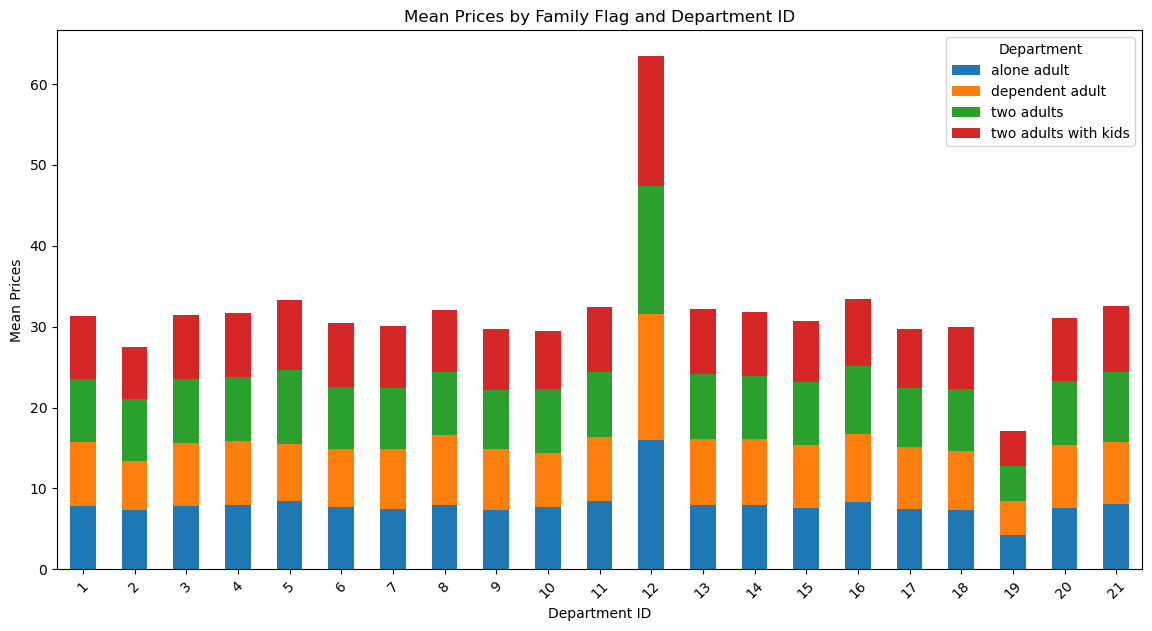

In [64]:
# Group by 'family_flag' and 'department_id', then calculate mean of 'prices'
grouped = profiles.groupby(['department_id', 'family_flag'])['prices'].mean().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.xlabel('Department ID')
plt.ylabel('Mean Prices')
plt.title('Mean Prices by Family Flag and Department ID')
plt.legend(title='Department')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_prices_fam-flag_department.png')) # Save the plot

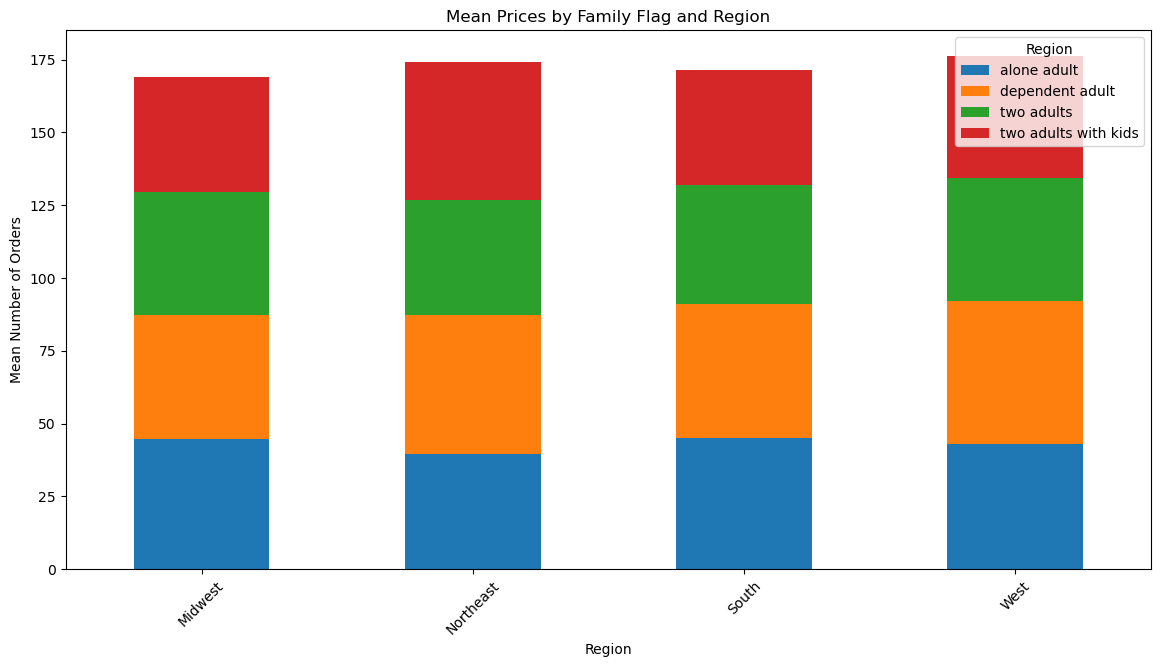

In [65]:
# Group by 'family_flag' and 'region', then calculate mean of 'prices'
grouped = profiles.groupby(['region', 'family_flag'])['max_order'].mean().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.xlabel('Region')
plt.ylabel('Mean Number of Orders')
plt.title('Mean Prices by Family Flag and Region')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_orders_fam-flag_region.png')) # Save the plot

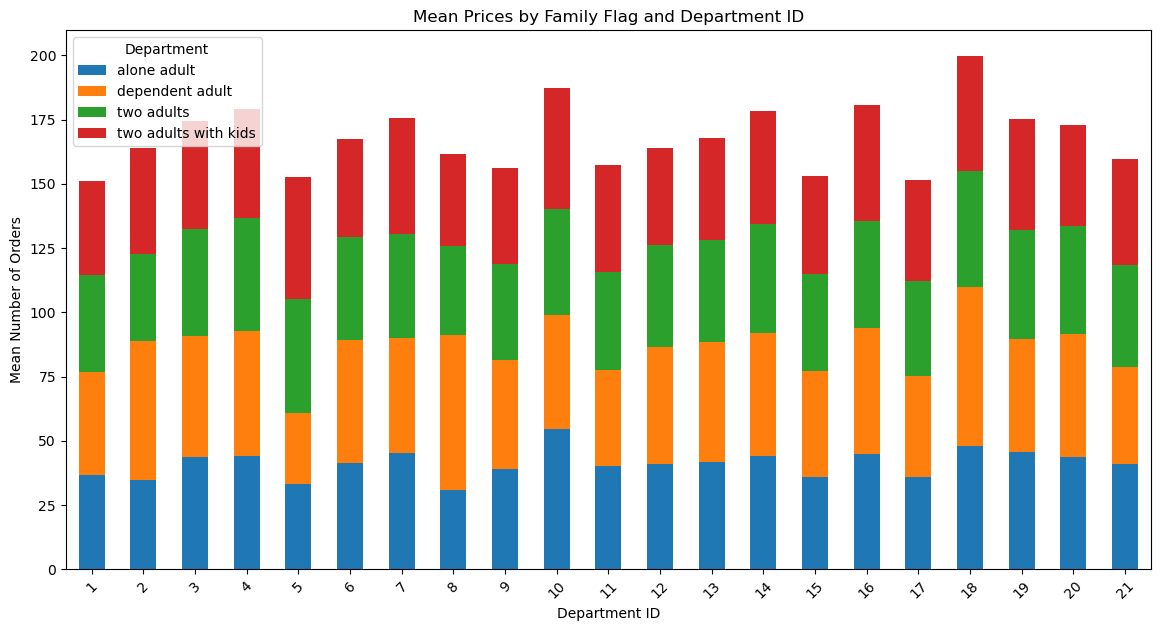

In [67]:
# Group by 'family_flag' and 'department_id', then calculate mean of 'prices'
grouped = profiles.groupby(['department_id', 'family_flag'])['max_order'].mean().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.xlabel('Department ID')
plt.ylabel('Mean Number of Orders')
plt.title('Mean Prices by Family Flag and Department ID')
plt.legend(title='Department')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_prices_fam-flag-_departmentp.png')) # Save the plot

When analyzing different family situation groups in context of geographic regions and shopping departments, we can claim the following observations: <br> 1. Regionality doesn't influence the spendings nor the number of orders made by each family flag. <br> 2. Income from each department is more or less equally distributed among family flags. <br> 3. Different departments have the same distribution of orders among family flags.

### Sales during the day and week days

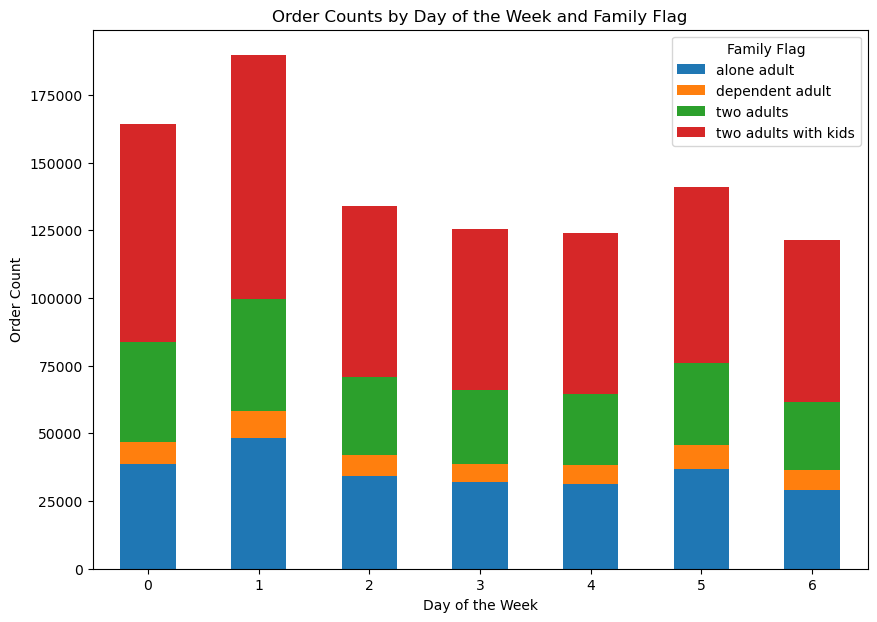

In [70]:
# Group by 'order_day_of_week' and 'family_flag', then count the occurrences
grouped = profiles.groupby(['order_day_of_the_week', 'family_flag']).size().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Day of the Week')
plt.ylabel('Order Count')
plt.title('Order Counts by Day of the Week and Family Flag')
plt.legend(title='Family Flag')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_orders_fam-flag_dow.png')) # Save the plot

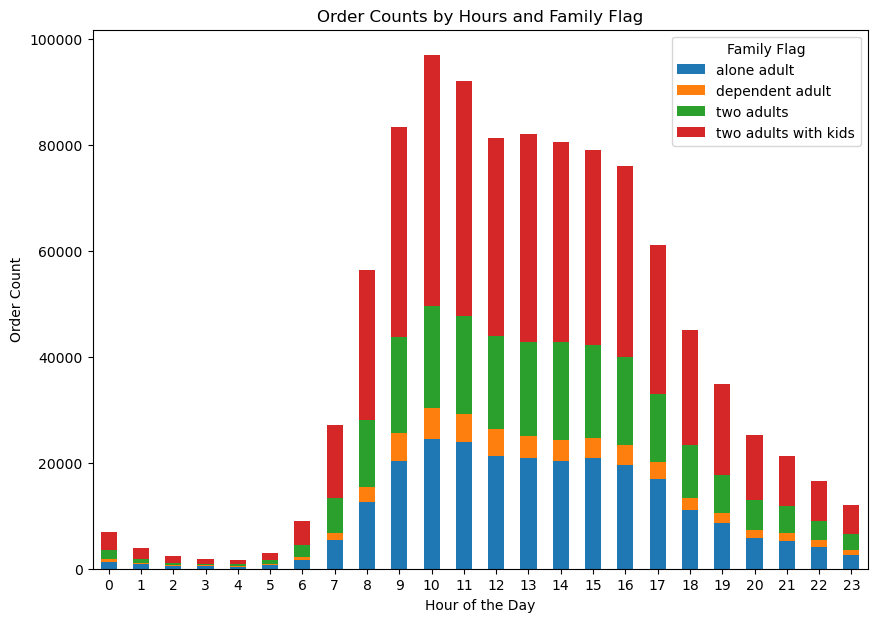

In [72]:
# Group by 'order_hour_of_day' and 'family_flag', then count the occurrences
grouped = profiles.groupby(['order_hour_of_day', 'family_flag']).size().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Hour of the Day')
plt.ylabel('Order Count')
plt.title('Order Counts by Hours and Family Flag')
plt.legend(title='Family Flag')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_orders_fam-flag_hours.png')) # Save the plot

# We see the distributions of orders by family flag along the week and hours of the day. <br> It looks like the proportions of each family group is maintained across these timepoints.

In [73]:
profiles.columns

Index(['product_name', 'department_id', 'prices', 'order_id', 'user_id',
       'order_number', 'order_day_of_the_week', 'order_hour_of_day',
       'price_range_loc', 'busiest_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spending_flag', 'customer_frequency', 'First Name',
       'Surnam', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'region', 'age_category', 'income_category',
       'family_flag'],
      dtype='object')

C:\Users\admin\AppData\Local\Temp\ipykernel_1204\3566550763.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = profiles.groupby(['age_category', 'loyalty_flag']).size().unstack(fill_value=0)


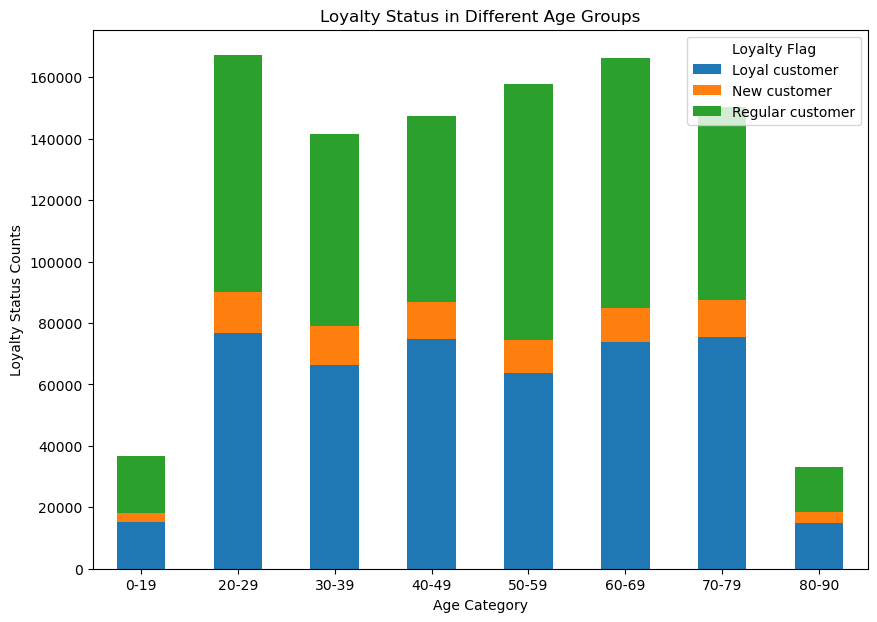

In [76]:
# Loyalty status in different age groups
grouped = profiles.groupby(['age_category', 'loyalty_flag']).size().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Age Category')
plt.ylabel('Loyalty Status Counts')
plt.title('Loyalty Status in Different Age Groups')
plt.legend(title='Loyalty Flag')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_loyalty_age.png')) # Save the plot

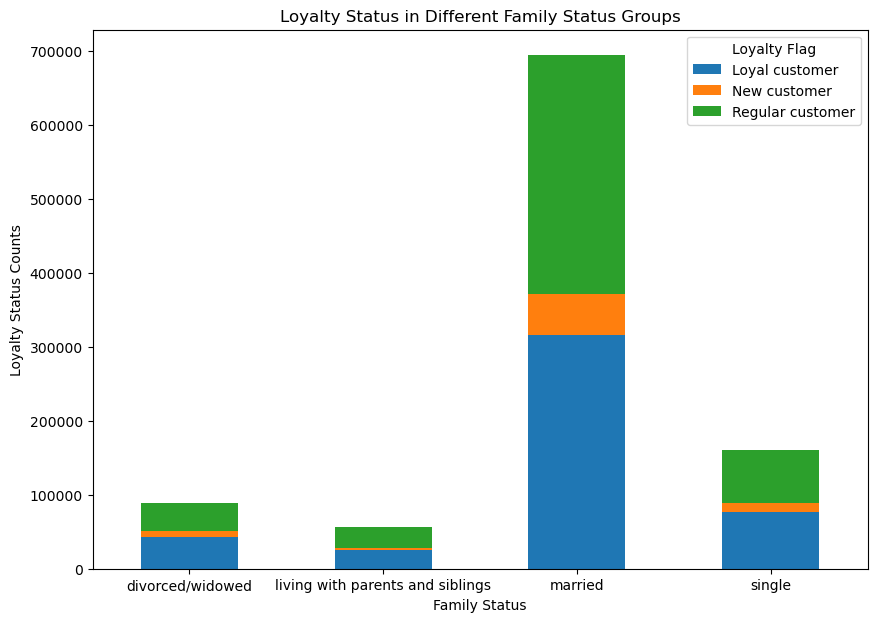

In [77]:
# Loyalty status in different family status groups
grouped = profiles.groupby(['fam_status', 'loyalty_flag']).size().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Family Status')
plt.ylabel('Loyalty Status Counts')
plt.title('Loyalty Status in Different Family Status Groups')
plt.legend(title='Loyalty Flag')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_loyalty_fam.png')) # Save the plot

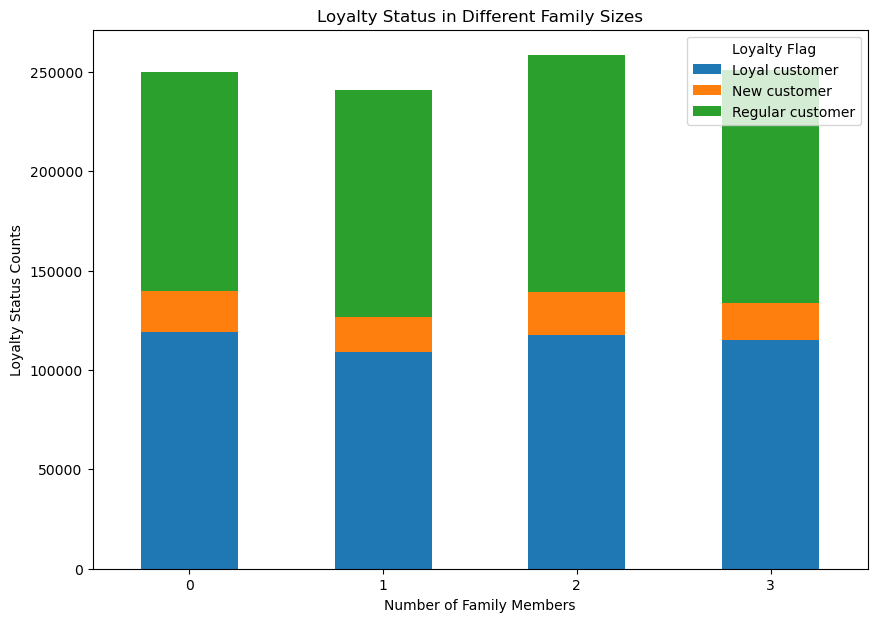

In [78]:
# Loyalty status in different family size groups
grouped = profiles.groupby(['n_dependants', 'loyalty_flag']).size().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Number of Family Members')
plt.ylabel('Loyalty Status Counts')
plt.title('Loyalty Status in Different Family Sizes')
plt.legend(title='Loyalty Flag')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_loyalty_fam_size.png')) # Save the plot

In [79]:
# Count spender types
profiles['spending_flag'].value_counts(dropna=False)

spending_flag
Low spender     999646
High spender       354
Name: count, dtype: int64

In [80]:
# Extract mean amount of money spent by High- vs. Low- spenders
profiles.groupby('spending_flag').agg({'prices': ['mean']})

,prices
,mean
spending_flag,
High spender,10.576271
Low spender,7.651818


In [81]:
# Calculate mean revenue by spender type
low_spender_revenue = 32315179*7.780655
print('Low spenders provide company with average income of ', low_spender_revenue, '$')
high_spender_revenue = 119497*10.580564
print('High spenders provide company with average income of ', high_spender_revenue, '$')

Low spenders provide company with average income of  251433259.062245 $
High spenders provide company with average income of  1264345.656308 $


<Figure size 1000x600 with 0 Axes>

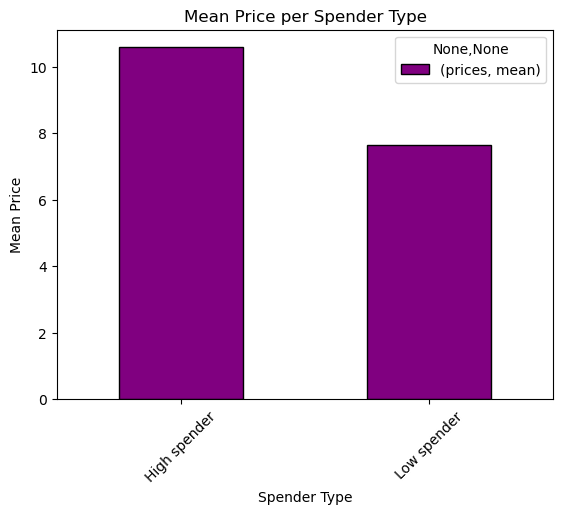

In [83]:
# Plot distribution of prices within spenders category as a bar chart
plt.figure(figsize=(10, 6))
profiles.groupby('spending_flag').agg({'prices': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')

# Add labels and title
plt.xlabel('Spender Type')
plt.ylabel('Mean Price')
plt.title('Mean Price per Spender Type')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_prices_spenders.png')) # Save the plot

<Figure size 1000x600 with 0 Axes>

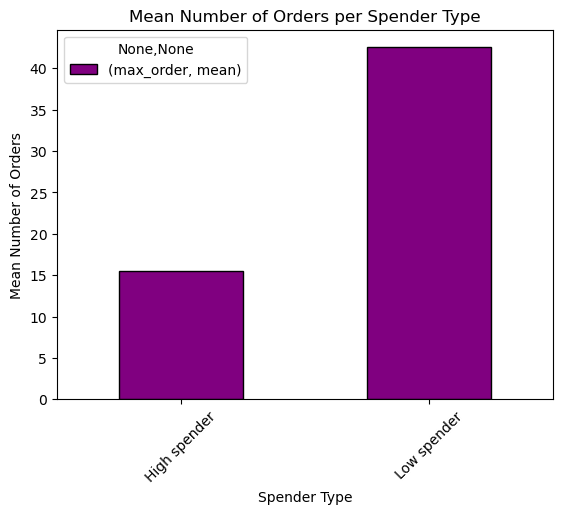

In [84]:
# Plot distribution of orders within spenders category as a bar chart
plt.figure(figsize=(10, 6))
profiles.groupby('spending_flag').agg({'max_order': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')

# Add labels and title
plt.xlabel('Spender Type')
plt.ylabel('Mean Number of Orders')
plt.title('Mean Number of Orders per Spender Type')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_orders_spenders.png')) # Save the plot

In [86]:
pd.crosstab(profiles['age_category'], profiles['spending_flag'])

spending_flag,High spender,Low spender
age_category,,
0-19,0,36782
20-29,62,167027
30-39,52,141520
40-49,193,147128
50-59,12,157691
60-69,6,166079
70-79,0,150430
80-90,29,32989


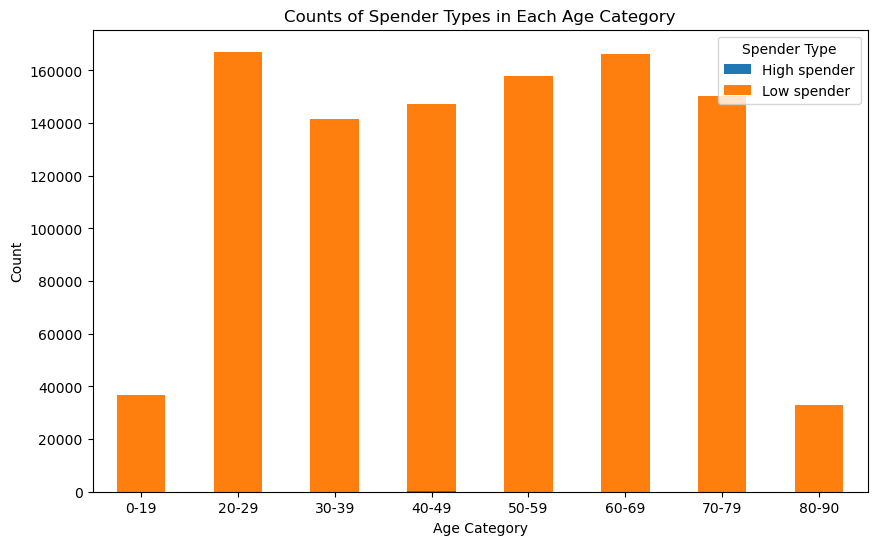

In [89]:
# Create a crosstab to count the occurrences of each spender type in each age category
spender_counts = pd.crosstab(profiles['age_category'], profiles['spending_flag'])

# Plotting the counts
spender_counts.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Counts of Spender Types in Each Age Category')
plt.xticks(rotation=0)
plt.legend(title='Spender Type')
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_age_spenders.png')) # Save the plot

In [91]:
pd.crosstab(profiles['income_category'], profiles['spending_flag'])

spending_flag,High spender,Low spender
income_category,,
25000-75000,145,346990
75001-125000,149,408768
125001-175000,60,237165
175001-225000,0,2256
225001-27500,0,1256
275001-325000,0,877
325001-375000,0,603
375001-425000,0,614
425001-475000,0,136


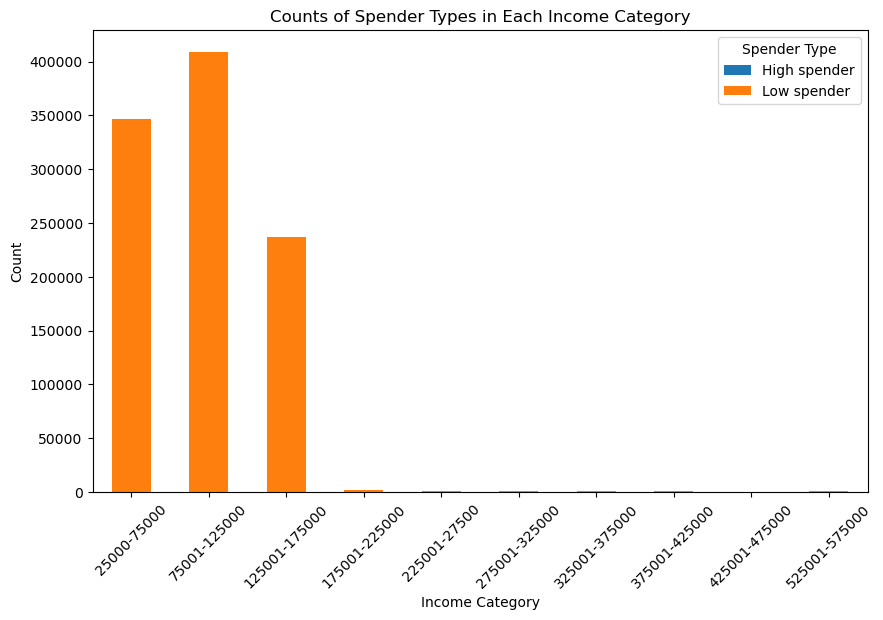

In [93]:
# Create a crosstab to count the occurrences of each spender type in each income category
spender_counts = pd.crosstab(profiles['income_category'], profiles['spending_flag'])

# Plotting the counts
spender_counts.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Counts of Spender Types in Each Income Category')
plt.xticks(rotation=45)
plt.legend(title='Spender Type')
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_income_spenders.png')) # Save the plot

In [94]:
# Check the numbers from graph above
profiles['income_category'].value_counts(dropna=False)

income_category
75001-125000     408917
25000-75000      347135
125001-175000    237225
175001-225000      2256
225001-27500       1256
525001-575000       981
275001-325000       877
375001-425000       614
325001-375000       603
425001-475000       136
475001-525000         0
575001-625000         0
Name: count, dtype: int64

In [95]:
# Check the distribution of high income customers among regions
pd.crosstab(profiles['income_category'], profiles['region'])

region,Midwest,Northeast,South,West
income_category,,,,
25000-75000,81334,56162,66994,142645
75001-125000,90160,70482,72548,175727
125001-175000,43083,49730,43945,100467
175001-225000,849,858,549,0
225001-27500,0,208,0,1048
275001-325000,631,246,0,0
325001-375000,0,0,0,603
375001-425000,0,614,0,0
425001-475000,0,0,136,0


<Figure size 1000x600 with 0 Axes>

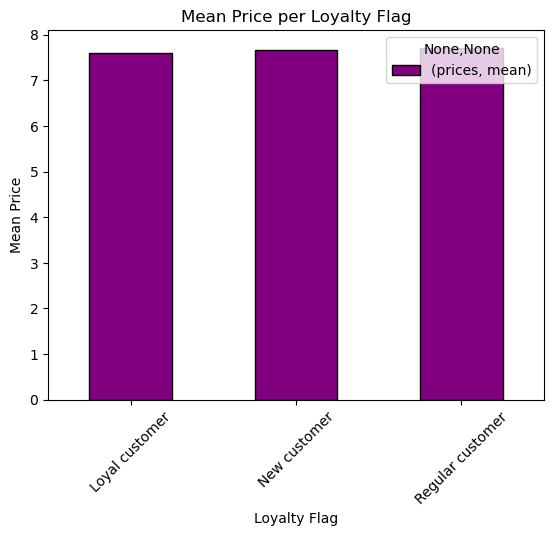

In [96]:
# Plot distribution of prices within loyalty category as a bar chart
plt.figure(figsize=(10, 6))
profiles.groupby('loyalty_flag').agg({'prices': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')

# Add labels and title
plt.xlabel('Loyalty Flag')
plt.ylabel('Mean Price')
plt.title('Mean Price per Loyalty Flag')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_prices_loyalty.png')) # Save the plot